# Diabetes analysis using logistic regression

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

data= pd.read_csv('diabetes.csv')
df= pd.DataFrame(data)

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**selecting features and targets and predicting**

In [81]:
X= df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]
y= df['Outcome']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  
    ('scaler', StandardScaler()),                                 
    ('model', LogisticRegression())                                
])


pipeline.fit(X_train,y_train)

pred_prob= pipeline.predict_proba(X_test)[:, 1]






**Plotting thresholds vs metrics**

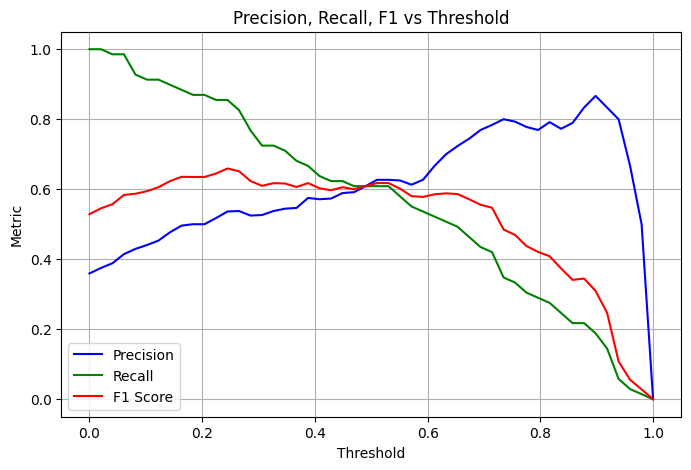

In [82]:
thresholds= np.linspace(0,1,50)
precision= []
recall= []
f1= []
confusion=[]

for t in thresholds:
  y_pred_custom = (pred_prob >= t).astype(int)
  confusion.append(confusion_matrix(y_test,y_pred_custom))
  precision.append(precision_score(y_test,y_pred_custom,zero_division=0))
  recall.append(recall_score(y_test,y_pred_custom))
  f1.append(f1_score(y_test,y_pred_custom))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision, label='Precision', color='blue',)
plt.plot(thresholds, recall, label='Recall', color='green')
plt.plot(thresholds, f1, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Metric')
plt.title('Precision, Recall, F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()